<a href="https://colab.research.google.com/github/GuyNYAMSI/exemple_repos/blob/main/151_1_1_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px">


<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>Introduction au Deep Learning avec Keras</h1></center>
<center><h2>L'algorithme du Perceptron</h2></center>
<hr style="border-width:2px;border-color:#75DFC1">


> Dans cet exercice, nous allons introduire le principe de fonctionnement de l'algorithme du perceptron. Pour se faire, nous allons entraîner un modèle basé sur le principe du perceptron simple à partir de la base de données *Moon* de la bibliothèque *scikit-learn*.

> Comme évoqué précédemment, le **choix** de la fonction d'activation dépend de **l'espace de sortie souhaité** du modèle Perceptron:
>
> * La fonction $\mathbf{sigmoid}$ prend des valeurs de $(-\infty, \infty) $ à $ [0,1]$, ce qui en fait un choix idéal pour afficher une valeur de probabilité pour la classification. Dans ce cas, le modèle Perceptron équivaut à la **Régression logistique**.
>
>Dans l'exemple ci-dessous, nous allons implémenter ce modèle.
>


* **(a)** Exécuter la cellule suivante pour importer les packages nécéssaires :

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

* **(b)** Exécuter la cellule suivante pour stocker dans X (**features**) et y (**target**) un échantillon du dataset *Moon* à l'aide du module make_moons.

In [2]:
X,y = make_moons(n_samples = 300, noise = 0.05) #300 observations choisies pour ne pas trop alourdir l'entraînement

* **(c)** Afficher les observations en colorant chacune d'entre elles selon la classe à laquelle elle appartient.

In [ ]:
## Insérez votre code ici

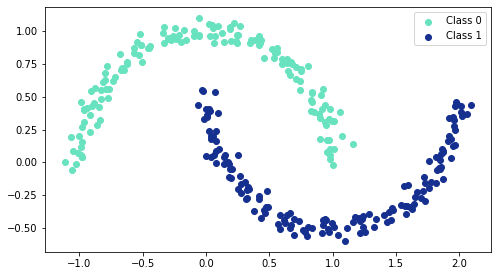

In [3]:
fig, ax = plt.subplots()

X_0_x = X[y == 0][:, 0]
X_0_y = X[y == 0][:, 1]

X_1_x = X[y == 1][:, 0]
X_1_y = X[y == 1][:, 1]
          
ax.scatter(X_0_x, X_0_y, color = "#68E2BF", label = "Class 0")
ax.scatter(X_1_x, X_1_y, color = "#163090", label = "Class 1")

ax.legend()
fig.set_size_inches(8, 4.5)



* **(d)** Séparer les données en un jeu d'entraiement **80%** et de test **20%**. Utiliser l'argument **`random_state=42`**

In [ ]:
## Insérez votre code ici

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) 

>Nous allons maintenant définir le 'neurone' ou perceptron par lequel passer nos données.
>
* Exécuter la cellule suivante afin d'importer les packages nécéssaires à l'initialisation du perceptron.

In [5]:
from tensorflow.keras.layers import Input, Dense #Pour instancier une couche Dense et une d'Input
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

>Dans un premier temps, nous allons définir l'**`Input`** qui prendra en compte la dimension des variables d'entrée, c'est à dire la dimension de nos variables explicatives. Les objets **Input** et **Output**, de classe *Keras Tensor*, permettent de construire des modèles à partir seulement des entrées. 
>
* **(e)** Instancier cet **`Input`** dans inputs.
* **(f)** Créer une couche **`Dense`** nommée **`dense1`** prenant en argument **`units=1`**, qui correspond au nombre de perceptrons de notre couche, une fonction d'activation **`sigmoid`** ainsi que l'argument **`kernel_regularizer=regularizers.l2(0.)`**

In [7]:
from sklearn.metrics.pairwise import kernel_metrics
## Insérez votre code ici
inputs = Input(shape=2, name="Input")
danses1 = Dense(units=1,activation="sigmoid",kernel_regularizer=regularizers.l2(0.))

In [8]:
inputs = Input(shape = 2, name = "Input")

dense1 = Dense(units = 1, activation = "sigmoid",kernel_regularizer=regularizers.l2(0.), name = "Dense_1")

>Nous allons à présent définir l'**`output`** de notre modèle. Comme ici, il n'est constitué que d'un seul perceptron, l'output correspond à notre input ) laquelle on a appliqué la couche **`dense1`**.
>
* **(g)** Dans **`outputs`**, appliquer la couche **`dense1`** sur L'**`Input`** précédent.
* **(h)** Instancier un **Model** prenant en argument l'**`Input`** et l'**`output`**

In [10]:
## Insérez votre code ici

In [11]:
outputs=dense1(inputs)

model = Model(inputs = inputs, outputs = outputs)

* **(i)** Compiler le modèle précedemment créé grâce à la méthode **`.compile`**. Utiliser comme fonction de perte : **"binary_crossentropy"**, comme optimiseur : **"adam"** et pour métrique : **["accuracy"]**.

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp; 
    <b>Rappel</b> : Une fonction de perte (le terme perte a été utilisé pour la première fois par Wald, 1939) permet de mesurer  <b>un écart</b> entre les valeurs observées des données et les valeurs calculées à l'aide de la fonction d'ajustement. C'est la fonction que l'on cherche à <b>minimiser pendant l'entraînement d'un modèle</b>.     
    <br> Dans le cadre de problèmes de classification binaire, on privilégie en général la fonction de perte binary crossentropy. On aura plus tendance à regarder l'erreur absolue ou quadratique moyenne pour des problèmes de régression.
</div>



In [ ]:
## Insérez votre code ici

In [ ]:
model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

* **(j)** Entrainer votre modèle sur le jeu de données d'entrainement avec comme argument : epochs=500, batch_size=32, validation_split=0.1

In [ ]:
## Insérez votre code ici

In [ ]:
model.fit(X_train,y_train,epochs=500,batch_size=2, validation_split=0.2)



Epoch 1/500
96/96 [==============================] - 2s 9ms/step - loss: 0.6091 - accuracy: 0.7031 - val_loss: 0.5596 - val_accuracy: 0.8125
Epoch 2/500
96/96 [==============================] - 0s 5ms/step - loss: 0.5830 - accuracy: 0.7552 - val_loss: 0.5345 - val_accuracy: 0.8125
Epoch 3/500
96/96 [==============================] - 0s 5ms/step - loss: 0.5581 - accuracy: 0.8073 - val_loss: 0.5124 - val_accuracy: 0.8125
Epoch 4/500
96/96 [==============================] - 0s 4ms/step - loss: 0.5360 - accuracy: 0.8281 - val_loss: 0.4922 - val_accuracy: 0.8125
Epoch 5/500
96/96 [==============================] - 0s 4ms/step - loss: 0.5158 - accuracy: 0.8594 - val_loss: 0.4739 - val_accuracy: 0.8125
Epoch 6/500
96/96 [==============================] - 0s 4ms/step - loss: 0.4977 - accuracy: 0.8646 - val_loss: 0.4564 - val_accuracy: 0.8542
Epoch 7/500
96/96 [==============================] - 0s 5ms/step - loss: 0.4812 - accuracy: 0.8750 - val_loss: 0.4410 - val_accuracy: 0.8750
Epoch 8/500
9

* **(k)** Calculer les prédictions faites par le modèle et les stocker dans **`test_pred`**.
> Nous disposons de  y_test et de test_pred. Cependant avant de pouvoir évaluer notre modèle, il va falloir à partir des predcitions, qui sont des probabilité d'appartenance à une classe, retrouver la classe prédite.

* **(l)** Grâce à la méthode **where** du module **numpy**. A **test_pred**, associer les classes et les prédictions faites pour chaque observation de l'échantillon test.


In [ ]:
## Insérez votre code ici

In [ ]:
test_pred = model.predict(X_test)
classes_pred = np.where(test_pred>=0.5, 1,0)

* **(m)** Afficher le rapport de classification du modèle ainsi que la matrice de confusion.

In [ ]:
## Insérez votre code ici

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, classes_pred))
print(confusion_matrix(y_test,classes_pred))



              precision    recall  f1-score   support

           0       0.87      0.90      0.89        30
           1       0.90      0.87      0.88        30

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60

[[27  3]
 [ 4 26]]


>Le score pour ce modèle semble plutôt correct mais est-il plus ou moins performant qu'une régréssion logistique classique ? 
>
>Pour vérifier cela, nous allons implémenter un modèle de régréssion logistique sur nos données.
>
* Exécuter la cellule suivante :

In [ ]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(C = 1.0)
clf.fit(X_train, y_train)

y_pred_rl = clf.predict(X_test) # Prédictions à l'aide de la régression logistique

cm = pd.crosstab(y_test, y_pred_rl, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm # Matrice de confusion


Classe prédite,0,1
Classe réelle,,
0,27,3
1,4,26


>Les résultats sont donc identiques, ce qui confirme bien les suppositions de départ. 
>Seulement, l'algorithme de Perceptron simple n'est plus utilisé en pratique.
>
> L'interêt de l'algorithme du Perceptron vient d'une technique démontrée en 1989 par George Cybenko qui consiste à empiler plusieurs perceptrons qui auront la même entrée sur une couche appelée **couche cachée** (*hidden layer* en anglais). 
>
> La sortie de cette couche de perceptrons sera ensuite donnée en entrée à un perceptron qui fera la classification binaire. Ce perceptron forme ce que l'on appelle la **couche de sortie** (*output layer* en anglais).
>
> Un algorithme de ce type s'appelle **Perceptron Multicouche** (*Multilayer Perceptron* en anglais), souvent abrégé par l'acronyme **MLP**.
>
> **Vous verrez ces modèles dans les prochains modules !**